# CLEANING AND PREPROCESSING THE DATA
The provided data is in CSV format, containing columns such as `Category`, `Latitude`, `Longitude`, `Location Name`, `Date`, `Victim Gender`,`Victim Age`, `Suspect Gender`, `Demographic` , `Weather`. The first step in training a model to provide crime statistics and identify areas prone to crime is to clean and preprocess the data. This would involve removing rows with NaN values.

In [267]:
import pandas as pd

# Read in the data
df = pd.read_csv('fake_crime_reports.csv')

# Drop rows with NaN values
df.dropna(inplace=True)

# VISUALIZING CRIME DATA
After cleaning and preprocessing the crime data, the next step is to explore the data using visualizations and descriptive statistics. This will help us gain insights into patterns and trends in the data. We will create different types of plots to achieve this.

Firstly, we will plot the frequency of different types of crimes using a bar chart. This will help us understand which types of crimes are most common in the data.

Secondly, we will identify areas with high crime rates using a scatter plot. This will help us visualize the location of the crimes and identify areas where crimes are more prevalent.

Lastly, we will examine relationships between different variables such as crime type and location using a pair plot. This will help us understand any correlations or patterns between different variables in the data.

To achieve this, we will be using two Python libraries, matplotlib and seaborn. These libraries provide tools for creating different types of plots that help us visualize the data and gain insights from it.

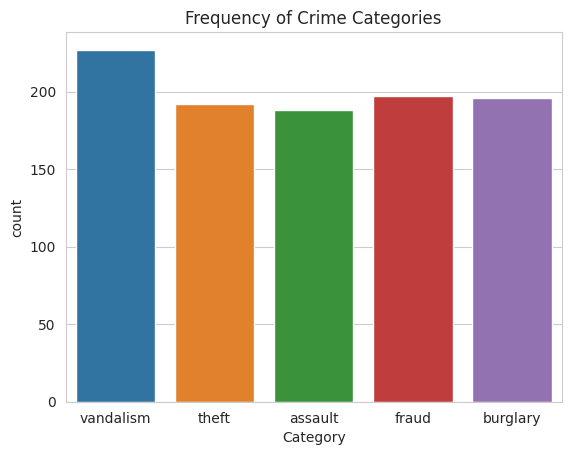

In [268]:
import matplotlib.pyplot as plt
import seaborn as sns

# Countplot of crime categories
sns.countplot(x='Category', data=df)
plt.title('Frequency of Crime Categories')
plt.show()

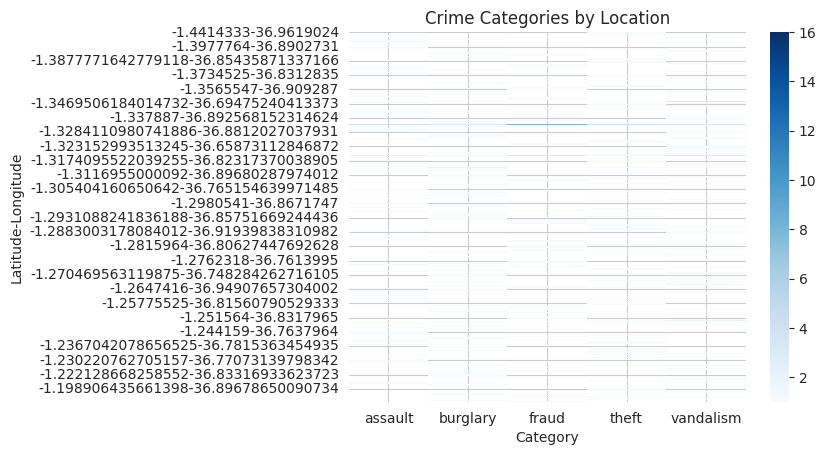

In [269]:
# Heatmap of crime categories by location
crime_location = df.groupby(['Latitude', 'Longitude'])['Category'].value_counts().unstack()
sns.heatmap(crime_location, cmap='Blues')
plt.title('Crime Categories by Location')
plt.show()

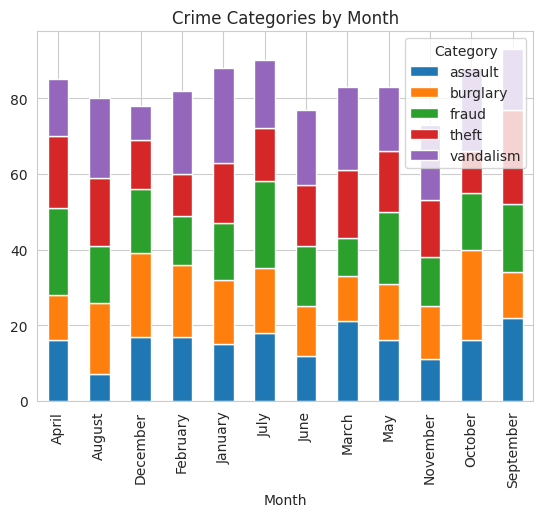

In [270]:
# Barplot of crime categories by month
df['Month'] = pd.to_datetime(df['Date']).dt.month_name()
df['Day of Week'] = pd.to_datetime(df['Date']).dt.day_name()
df_month = df.groupby(['Month', 'Category']).size().unstack()
df_month.plot(kind='bar', stacked=True)
plt.title('Crime Categories by Month')
plt.show()

In [271]:
# Descriptive statistics of crime data
print(df.describe())

          Latitude    Longitude   Victim Age
count  1000.000000  1000.000000  1000.000000
mean     -1.298762    36.834457    39.437000
std       0.053988     0.081732    12.450825
min      -1.441433    36.657879    18.000000
25%      -1.332894    36.772829    29.000000
50%      -1.301874    36.829367    40.000000
75%      -1.259867    36.898111    50.000000
max      -1.171086    36.995169    60.000000


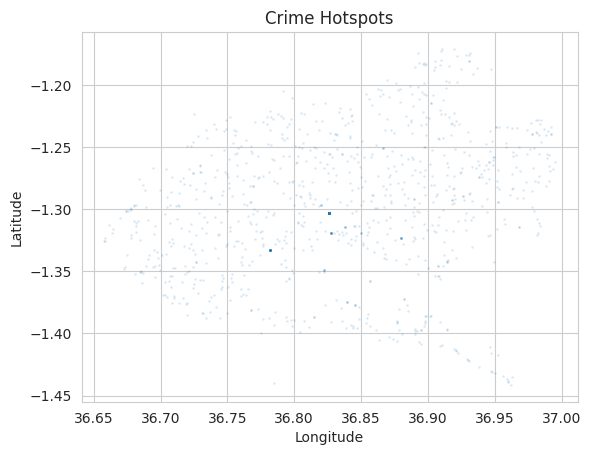

In [272]:
# Identify areas with high crime rates
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.1, s=1)
plt.title('Crime Hotspots')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


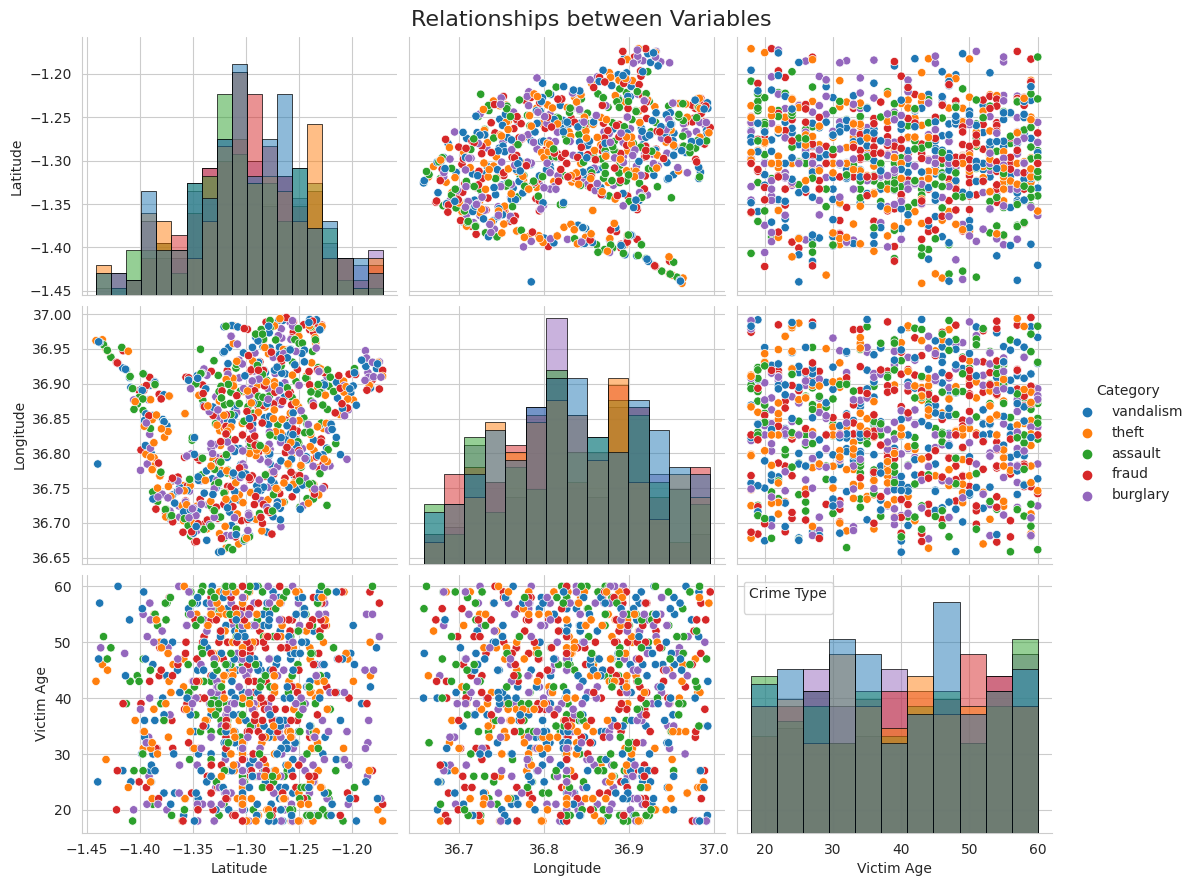

In [273]:
# Plot relationships between variables
sns.set_style("whitegrid")
sns.pairplot(df, hue='Category', height=3, aspect=1.2, diag_kind="hist", diag_kws=dict(edgecolor="k", linewidth=0.5))
plt.subplots_adjust(top=0.95)
plt.suptitle('Relationships between Variables', fontsize=16)
plt.legend(title='Crime Type')
plt.show()


# IDENTIFY PATTERNS AND TRENDS IN THE DATA
Next, we will group the data by Latitude and Longitude to obtain the number of reports made for each unique location. Then, we will sort the data by the number of reports in descending order to identify the areas with the highest number of reported crimes. Afterward, we will group the data again by Category, Latitude, and Longitude to obtain the count of each unique combination of crime type and location. Then, we will sort the data by the count in descending order to identify the most common crime types for each location.

We will group the data by day of the week, Latitude, and Longitude, and count the number of reports for each day. We will also group the data by month, Latitude, and Longitude, and count the number of reports for each month.

To create a dictionary for each location with its details, we will iterate over the `location_counts` dataframe. The dictionary should contain the latitude, longitude, number of reports, most frequent crime type, most frequent day of the week, most frequent month, and the likelihood of crime. We will append the dictionary to a list and convert the resulting list to a JSON file named `data.json`. This JSON file, `data.json`, will be accessed through an API endpoint and displayed on the SafeCity app on a map using the Google Maps API.

JSON Structure
```json
{
    "Latitude": 37.7749,
    "Longitude": -122.4194,
    "Number of Reports": 10,
    "Category": {
        "theft": 5,
        "vandalism": 2,
        "assault": 1,
        "burglary": 1,
        "fraud": 1
    },
    "dayOfWeek": {
        "Monday": 2,
        "Tuesday": 2,
        "Wednesday": 2,
        "Thursday": 1,
        "Friday": 1,
        "Saturday": 1,
        "Sunday": 1
    },
    },
    "month": {
        "January": 11,
        "February": 1,
        "March": 6,
        "April": 8,
        "May": 1,
        "June": 5,
        "July": 9,
        "August": 10,
        "September": 11,
        "October": 12,
        "November": 2,
        "December": 3
    },
    "Location Name": "Buru Buru",
    "Prediction": "High"
}
```

In [274]:
import json

# Initialize an empty list to store the dictionaries for each location
location_list = []


# Group the data by Latitude and Longitude to get the number of reports made for each unique location.
location_counts = df.groupby(['Latitude', 'Longitude']).size().reset_index(name='Number of Reports')

# Sort the data by the number of reports in descending order to identify the areas with the highest number of reported crimes.
location_counts = location_counts.sort_values(by='Number of Reports', ascending=False)

# Group the data again by Category, Latitude, and Longitude to get the count of each unique combination of crime type and location.
crime_counts = df.groupby(['Category', 'Latitude', 'Longitude', "Location Name"]).size().reset_index(name='Count')

# Sort the data by the count in descending order to identify the most common crime types for each location.
crime_counts = crime_counts.sort_values(by=['Latitude', 'Longitude', 'Count'], ascending=[True, True, False])
# Group the data by day of week, Latitude, and Longitude and count the number of reports for each day.
day_counts = df.groupby(['Day of Week', 'Latitude', 'Longitude']).size().reset_index(name='Reports For Day')
# Group the data by month, Latitude, and Longitude and count the number of reports for each month.
month_counts = df.groupby(['Month', 'Latitude', 'Longitude']).size().reset_index(name='Reports For Month')

# Iterate over the location_counts dataframe
for index, row in location_counts.iterrows():
    
    # Get the latitude and longitude for the current location
    latitude, longitude = row['Latitude'], row['Longitude']

    # Get the number of reports for the current location
    number_of_reports = row['Number of Reports']

    # Get the crime counts for the current location
    crime_counts_dict = {}
    for index2, row2 in crime_counts[crime_counts['Latitude'] == latitude][crime_counts['Longitude'] == longitude].iterrows():
        crime_counts_dict[row2['Category']] = int(row2['Count'])

    # Get the most frequent crime for the current location. This is the value with the highest count in crime_counts_dict.
    frequent_crime = max(crime_counts_dict, key=crime_counts_dict.get)

    # Get the day counts for the current location
    day_counts_dict = {}
    for index3, row3 in day_counts[day_counts['Latitude'] == latitude][day_counts['Longitude'] == longitude].iterrows():
        day_counts_dict[row3['Day of Week']] = int(row3['Reports For Day'])

    # Get the most frequent day for the current location
    frequent_day = max(day_counts_dict, key=day_counts_dict.get)

    # Get the month counts for the current location
    month_counts_dict = {}
    for index4, row4 in month_counts[month_counts['Latitude'] == latitude][month_counts['Longitude'] == longitude].iterrows():
        month_counts_dict[row4['Month']] = int(row4['Reports For Month'])

    # Get the most frequent month for the current location
    frequent_month = max(month_counts_dict, key=month_counts_dict.get)

    # Get the location name for the current location
    location_name = crime_counts[crime_counts['Latitude'] == latitude][crime_counts['Longitude'] == longitude].iloc[0]['Location Name']

    # Predict likelihood of crime for the current location based on the number of reports
    if number_of_reports > 10:
        likelihood_of_crime = 'High'
    elif number_of_reports > 5:
        likelihood_of_crime = 'Medium'
    else:
        likelihood_of_crime = 'Low'

    # Create a dictionary for the current location
    location_dict = {
        'Latitude': latitude,
        'Longitude': longitude,
        'location_name': location_name,
        'Number of Reports': number_of_reports,
        'Categories': crime_counts_dict,
        'Frequent Crime': frequent_crime,
        'Days': day_counts_dict,
        'Notorius Day': frequent_day,
        'Months': month_counts_dict,
        'Notorius Month': frequent_month,
        'Likelihood of Crime': likelihood_of_crime
    }

    # Append the dictionary to the list
    location_list.append(location_dict)

# Convert the data to JSON format and save it to a file
with open('data.json', 'w') as outfile:
    json.dump(location_list, outfile)

/tmp/ipykernel_31438/3121540531.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for index2, row2 in crime_counts[crime_counts['Latitude'] == latitude][crime_counts['Longitude'] == longitude].iterrows():
/tmp/ipykernel_31438/3121540531.py:42: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for index3, row3 in day_counts[day_counts['Latitude'] == latitude][day_counts['Longitude'] == longitude].iterrows():
/tmp/ipykernel_31438/3121540531.py:50: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for index4, row4 in month_counts[month_counts['Latitude'] == latitude][month_counts['Longitude'] == longitude].iterrows():
/tmp/ipykernel_31438/3121540531.py:57: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  location_name = crime_counts[crime_counts['Latitude'] == latitude][crime_counts['Longitude'] == longitude].iloc[0]['Location Name']
